<a href="https://colab.research.google.com/github/Nauviii/first_project_DataAnalyst/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fikri Kurnia
- **Email:** ds.fikri.kurnia@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/fikrikurnia/academies

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca dan musim (musim panas, dingin, gugur, semi) terhadap jumlah sepeda yang dipinjam?
- Pertanyaan 2 : Apakah jumlah sepeda yang dipinjam lebih tinggi pada hari kerja dibandingkan akhir pekan?
- Pertanyaan 3 : Apakah pertanyaan 1 dan pertanyaan 2 saling berhubungan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [3]:
!git clone https://github.com/Nauviii/first_project_DataAnalyst
file_path_day = "first_project_DataAnalyst/dataset/day.csv"


Cloning into 'first_project_DataAnalyst'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 48 (delta 22), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (48/48), 517.07 KiB | 3.80 MiB/s, done.
Resolving deltas: 100% (22/22), done.


### Gathering Data

In [4]:
bike_day_df = pd.read_csv(file_path_day)
display(bike_day_df.head(10))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Hanya menggunakan satu dataset(day.csv), dikarenakan sudah cukup untuk menjawab pertanyaan bisnis.

### Assessing Data

**1. Memahami stuktur data**

In [5]:
bike_day_df.info() # Informasi kolom, tipe data, dan missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat columns yang memiliki tipe data yang kurang tepat, yaitu columns :

* dteday (object yang seharusnya bertipe datetime)
* season, yr, mnth, weekday, dan weathersit (int64 yang seharusnya bertipe str)

**2. Memeriksa Missing Value**

In [6]:
bike_day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


" Tidak terdapat data yang kosong(Missing Value) pada dataset

**3. Memeriksa Duplikat**

In [7]:
bike_day_df.duplicated().sum()

0

" Tidak terdapat duplikat data pada dataset

**4. Memeriksa Parameter Statistik**

In [8]:
bike_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Distribusi Normal ,dapat dilihat bahwa mean dan medianya tidak begitu berbeda jauh.

- Tidak terdapat Outlier

- Tidak ada columns yang memiliki jumlah baris yang berbeda

### Cleaning Data

 Membersihkan data day.csv dan hour.csv . Berikut tahapan yang akan dilakukan pada cleaning Data :
- Menagani missing values(✅)
- Menagani data duplikat(✅)
- Memeriksa dan menstandarakan format data(❎)

Memeriksa dan menstandarkan format data pada :

### 1. dteday (Mengubah tipe data object menjadi tipe data datetime)

In [9]:
# Data day.csv
bike_day_df["dteday"] = pd.to_datetime(bike_day_df["dteday"])
display(bike_day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

None

Terlihat bahwa tipe data dteday pada dataset sudah berubah menjadi bertipe data datetime

### 2. Season, yr, mnth, dan weekday (Mengubah tipe data int menjadi nilai string yang seharusnya)

1. Mengubah tipe data season yang memiliki value (1, 2, 3, 4), dimana {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}.
2. Mengubah tipe data yr menjadi keterangan tahun.
3. Mengubah tipe data mnth menjadi keterangan bulan.
4. Mengubah tipe data weekday menjadi keterangan hari.

In [10]:
# Mengubah tipe data season
def replacing_season(data_df : pd.core.frame.DataFrame )->pd.core.frame.DataFrame :
  """
   Mengubah nilai numerik pada kolom 'season' menjadi nama musim di DataFrame 'data_df'.

    Fungsi ini memetakan nilai numerik dalam kolom 'season' ke nama musim (Spring, Summer, Fall, Winter)
    menggunakan dictionary mapping. Nilai dalam kolom 'season' akan dimodifikasi secara langsung, dan
    DataFrame yang telah diperbarui dikembalikan sebagai output.

    Mapping yang digunakan:
        1 -> Spring
        2 -> Summer
        3 -> Fall
        4 -> Winter

    Returns:
        pd.core.frame.DataFrame: DataFrame 'data_df' yang telah diperbarui dengan kolom 'season'
        berisi nama musim sebagai string.
  """
  dictionary = {
      1 : "Spring",
      2 : "Summer",
      3 : "Fall",
      4 : "Winter"
  }
  data_df["season"] = data_df["season"].replace(dictionary)
  return data_df




In [11]:
# Mengubah tipe data season pada dataset
bike_day_df = replacing_season(bike_day_df)
display(bike_day_df)
display(bike_day_df["season"].value_counts())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


,count
season,
Fall,188
Summer,184
Spring,181
Winter,178


Dapat dilihat bahwa nilai dari columns season sudah diubah dan nilai yang sebenarnya.

In [12]:
# Mengubah tipe data yr, mnth, and weekday
def replacing_other(df: pd.DataFrame) -> pd.DataFrame:
    """
    Mengubah kolom 'yr', 'mnth', dan 'weekday' dalam DataFrame berdasarkan kolom 'dteday'.

    Fungsi ini memanfaatkan kolom 'dteday' yang bertipe datetime untuk membuat kolom baru:
        - 'yr': Tahun dari kolom 'dteday'.
        - 'mnth': Nama bulan dari kolom 'dteday'.
        - 'weekday': Nama hari dari kolom 'dteday'.
    Kolom-kolom baru ini ditambahkan atau diperbarui dalam DataFrame yang diberikan.

    Parameter:
        df (pd.DataFrame): DataFrame input yang harus memiliki kolom 'dteday' bertipe datetime.

    Returns:
        pd.DataFrame: DataFrame yang telah diperbarui dengan kolom 'yr', 'mnth', dan 'weekday'.
    """
    # Contoh mengubah kolom 'yr', 'mnth', dan 'weekday' menjadi kategori
    df["yr"] = df["dteday"].dt.year
    df["mnth"] = df["dteday"].dt.month_name()
    df["weekday"] = df["dteday"].dt.day_name()
    return df

In [13]:
# Mengubah tipe data pada dataset
# Panggil fungsi dan perbarui DataFrame
bike_day_df = replacing_other(bike_day_df)

# Tampilkan DataFrame
display(bike_day_df)

# Tampilkan frekuensi kombinasi nilai pada kolom 'yr', 'mnth', dan 'weekday'
display(bike_day_df[["yr", "mnth", "weekday"]].value_counts())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,2012,December,0,Thursday,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,2012,December,0,Friday,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,2012,December,0,Saturday,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,2012,December,0,Sunday,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


yr    mnth       weekday  
2011  April      Friday       5
      November   Wednesday    5
2012  July       Sunday       5
                 Tuesday      5
      June       Friday       5
                             ..
2011  May        Friday       4
      March      Sunday       4
                 Saturday     4
                 Monday       4
2012  September  Wednesday    4
Name: count, Length: 168, dtype: int64

Dapat dilihat bahwa nilai pada columns yr, mnth, dan weekday sudah diubah menjadi nilai yang sebenarnya dan lebih mudah untuk dianalisis selanjutnya

In [14]:
# Mengubah nilai columns weathersit menjadi nilai yang sebenarnya
def replacing_weather(data_df : pd.core.frame.DataFrame )->pd.core.frame.DataFrame :
  """
   Mengubah nilai numerik pada kolom 'weathersit' menjadi kondisi cuaca yang sebenarnya'.

    Fungsi ini memetakan nilai numerik dalam kolom 'weathersit'
    menggunakan dictionary mapping. Nilai dalam kolom 'weathersit' akan dimodifikasi secara langsung, dan
    DataFrame yang telah diperbarui dikembalikan sebagai output.

    Mapping yang digunakan:
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'

    Returns:
        pd.core.frame.DataFrame: DataFrame 'data_df' yang telah diperbarui dengan kolom 'weathersit'
        berisi nama musim sebagai string.
  """
  weather_labels = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}

  data_df["weathersit"] = data_df["weathersit"].replace(weather_labels)
  return data_df


In [15]:
 # Panggil fungsi dan perbarui DataFrame
bike_day_df = replacing_weather(bike_day_df)

# Tampilkan DataFrame
display(bike_day_df["weathersit"].value_counts())

,count
weathersit,
"Clear, Few clouds, Partly cloudy",463
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds",247
"Light Snow, Light Rain + Thunderstorm + Scattered clouds",21


Dapat dilihat bahwa nilai pada columns weathersit sudah diubah menjadi nilai yang sebenarnya.

In [16]:
# data_cleaned
bike_day_df.to_csv("first_project_DataAnalyst/dashboard/cleaned_day_df.csv", index=False)

**Insight:**
- Data Kualitas: Data menjadi lebih bersih dengan mengidentifikasi dan menangani nilai yang hilang (missing values), duplikasi, atau data yang tidak valid.
- Struktur Konsisten: Kolom-kolom dataset sudah memiliki tipe data yang benar, sehingga siap untuk analisis.
- Transformasi Data: Nilai kategori atau angka diubah menjadi format yang lebih mudah dipahami (contoh: mengganti angka dengan nama musim atau hari).


## Exploratory Data Analysis (EDA)

In [17]:
# Melihat rangkuman parameter statistik
bike_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,January,NaN,Saturday,NaN,"Clear, Few clouds, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan rangkuman parameter statistik di atas, diperoleh unique, maks, min, kuartil, dan standar deviasi dari total 731 pelanggan penyewa sepeda.

In [18]:
# Mencari jumlah pelanggan terbanyak diantara 4 musim yang ada berdasarkan cnt (count of total rental bikes including both casual and registered)
season_count_day = bike_day_df.groupby(by = ["season"]).agg({
    "cnt" : "sum"
})
season_count_day

,cnt
season,
Fall,1061129
Spring,471348
Summer,918589
Winter,841613


Dari informasi di atas, kita mendapatkan bahwa total pelanggan terbanyak terjadi pada musim Fall(musim gugur), yaitu terdapat : 1.061.129 pelanggan ,selanjutnya total pelanggan terbanyak kedua terjadi pada musim Summer(musim panas), yaitu terdapat : 918.589 pelanggan, selanjutnya total pelanggan terbanyak ketiga terjadi pada musim Winter(musim dingin), yaitu terdapat : 841.613 pelanggan, dan terakhir pelanggan paling sedikit terjadi pada musim Spring(musim semi), yaitu hanya terdapat : 471.348 pelanggan. Informasi ini tentunya dapat memberikan gambaran mengenai perbandingan banyaknya total pelanggan pada setiap musimnya.

In [19]:
# Melakukan Analisis Deskriptif
bike_day_df.groupby("season")["cnt"].agg(["mean", "std", "min", "max"])

,mean,std,min,max
season,,,,
Fall,5644.303191,1459.800381,1115,8714
Spring,2604.132597,1399.942119,431,7836
Summer,4992.331522,1695.977235,795,8362
Winter,4728.162921,1699.615261,22,8555


Dari informasi di atas, kita mendapatkan bahwa :

1.Standar Deviasi (Variasi Penyewaan):
- Variasi penyewaan tertinggi terjadi pada musim dingin (winter) dengan standar deviasi 1.699,61 menunjukkan bahwa jumlah penyewaan bervariasi lebih luas dibandingkan musim lainnya.
- Variasi penyewaan terendah terjadi pada musim semi (Spring) dengan standar deviasi 1.399,94, menunjukkan bahwa penyewaan di musim ini lebih konsisten.

2.Nilai Minimum dan Maksimum:

- Musim Dingin (Winter) memiliki nilai minimum terendah, yaitu 22 sepeda, menunjukkan bahwa ada hari tertentu dengan hampir tidak ada penyewaan selama musim ini.
- Musim Gugur (Fall) memiliki nilai maksimum tertinggi, yaitu 8,714 sepeda dalam satu hari, menunjukkan puncak penyewaan tertinggi dibandingkan musim lainnya.


In [20]:
# Faktor cuaca
print("Banyaknya penyewa terhadap Cuaca (weathersit)\n")
display(bike_day_df.groupby("weathersit")["cnt"].sum())

# Hubungan antara faktor cuaca dengan musim
print("\n\nCuaca yang terjadi pada setiap musimnya")
display(bike_day_df.groupby(["season","weathersit"]).size().unstack())

Banyaknya penyewa terhadap Cuaca (weathersit)



,cnt
weathersit,
"Clear, Few clouds, Partly cloudy",2257952
"Light Snow, Light Rain + Thunderstorm + Scattered clouds",37869
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds",996858




Cuaca yang terjadi pada setiap musimnya


weathersit,"Clear, Few clouds, Partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds"
season,,,
Fall,136,4,48
Spring,111,4,66
Summer,113,3,68
Winter,103,10,65


+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Dapat dilihat bahwa cuaca dan musim sangat berpengaruh terhadap jumlah pelanggan

In [21]:
# Mencari jumlah pelanggan mulai hari senin sampai dengan hari minggu
week_day_df = bike_day_df.groupby(by = ["weekday"]).agg({
    "cnt" : "sum"
})

In [22]:
# Menentukan hari kerja dan akhir pekan
bike_day_df["day_type"] = bike_day_df["weekday"].apply(
    lambda x: "Workday" if x in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"] else "Weekend"
)
bike_day_df[["weekday", "day_type"]].head(7)


,weekday,day_type
0,Saturday,Weekend
1,Sunday,Weekend
2,Monday,Workday
3,Tuesday,Workday
4,Wednesday,Workday
5,Thursday,Workday
6,Friday,Workday


Menambah kolom baru yang berisikan tipe hari dalam 1 minggu. Hari senin sampai jumm'at termasuk kedalam kelompok hari kerja(Workday) ,sedangkan hari sabtu dan minggu termasuk kedalam kelompok akhir pekan(Weekend).

In [23]:
# Mencari jumlah pelanggan pada hari kerja(Workday) dan akhir pekan(Weekend)

work_filter = bike_day_df["day_type"].isin(["Workday"])
holiday_filter = bike_day_df["day_type"].isin(["Weekend"])

# Hitung total pelanggan dari hari Senin sampai Jumat
total_pelanggan_1 = bike_day_df.loc[work_filter, "cnt"].sum()

print(f"Total pelanggan pada hari kerja adalah: {total_pelanggan_1}")

# Hitung total pelanggan hari sabtu dan minggu
total_pelanggan_2 = bike_day_df.loc[holiday_filter, "cnt"].sum()

print(f"Total pelanggan pada akhir pekan adalah: {total_pelanggan_2}")


Total pelanggan pada hari kerja adalah: 2370845
Total pelanggan pada akhir pekan adalah: 921834


Dari informasi di atas, kita mendapatkan informasi bahwa total pelanggan pada hari kerja(Workday) lebih banyak daripada total pelanggan pada akhir pekan(Weekend),dimana total pelanggan pada hari kerja(Workday) sebanyak : 2.370.845 pelanggan, sedangkan total pelanggan pada akhir pekan(Weekend) sebanyak : 921.834 pelanggan

In [24]:
# Melakukan analisis deskriptif
bike_day_df.groupby("day_type")["cnt"].describe()


,count,mean,std,min,25%,50%,75%,max
day_type,,,,,,,,
Weekend,210.0,4389.685714,2042.527458,605.0,2765.25,4467.5,5871.5,8714.0
Workday,521.0,4550.566219,1893.171210,22.0,3272.00,4575.0,5992.0,8362.0


Dari informasi di atas, kita mendapatkan informasi bahwa :
1. **Rata-rata pelanggan penyewaan sepeda.**
- Hari Kerja (Workday): Rata-rata jumlah sepeda yang dipinjam adalah 4,550.57.
- Akhir Pekan (Weekend): Rata-rata jumlah sepeda yang dipinjam adalah 4,389.69.

**Kesimpulan**: Penyewaan sepeda rata-rata lebih tinggi pada hari kerja dibandingkan akhir pekan, tetapi perbedaannya tidak terlalu signifikan.
2. **Standar Deviasi:**

- Hari Kerja (Workday): Standar deviasi sebesar 1,893.17, menunjukkan variasi yang cukup besar dalam jumlah penyewaan sepeda.
- Akhir Pekan (Weekend): Standar deviasi sebesar 2,042.53, menunjukkan variasi yang sedikit lebih besar dibandingkan hari kerja.

**Kesimpulan**: Variasi penyewaan sepeda lebih tinggi pada akhir pekan, yang mungkin menunjukkan pola penggunaan yang lebih beragam (misalnya, untuk liburan,rekreasi, dll).
3. **Nilai Minimum dan Maksimum:**

  Hari Kerja (Workday):
- Minimum: 22 sepeda.
- Maksimum: 8,362 sepeda.

  Akhir Pekan (Weekend):
- Minimum: 605 sepeda.
- Maksimum: 8,714 sepeda.

**Kesimpulan**: Penyewaan sepeda terendah terjadi pada hari kerja, tetapi puncak penggunaan pada akhir pekan sedikit lebih tinggi dibandingkan hari kerja.
4. **Kuartil (25%, 50%, 75%):**

  Hari Kerja (Workday):
- Median (50%): 4,575 sepeda.
- Rentang interkuartil (IQR): 3,272 (25%) hingga 5,992 (75%).

  Akhir Pekan (Weekend):
- Median (50%): 4,467 sepeda.
- Rentang interkuartil (IQR): 2,765.25 (25%) hingga 5,871.5 (75%).

**Kesimpulan**: Median penyewaan sepeda pada hari kerja sedikit lebih tinggi dibandingkan akhir pekan, tetapi akhir pekan menunjukkan rentang data yang lebih lebar.

**Insight:**
- Tren dan Pola: Analisis statistik dan visualisasi mengungkap pola penting, seperti musim dengan jumlah penyewaan sepeda tertinggi atau pengaruh cuaca terhadap jumlah penyewaan.
- Hubungan Antar Variabel: Menemukan korelasi atau hubungan antar atribut, misalnya, hubungan antara season dengan jumlah penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana pengaruh musim (musim panas, dingin, gugur, semi) terhadap jumlah sepeda yang dipinjam?

<ipython-input-25-4f649953aa58>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_sales, x="season", y="cnt", palette="viridis")


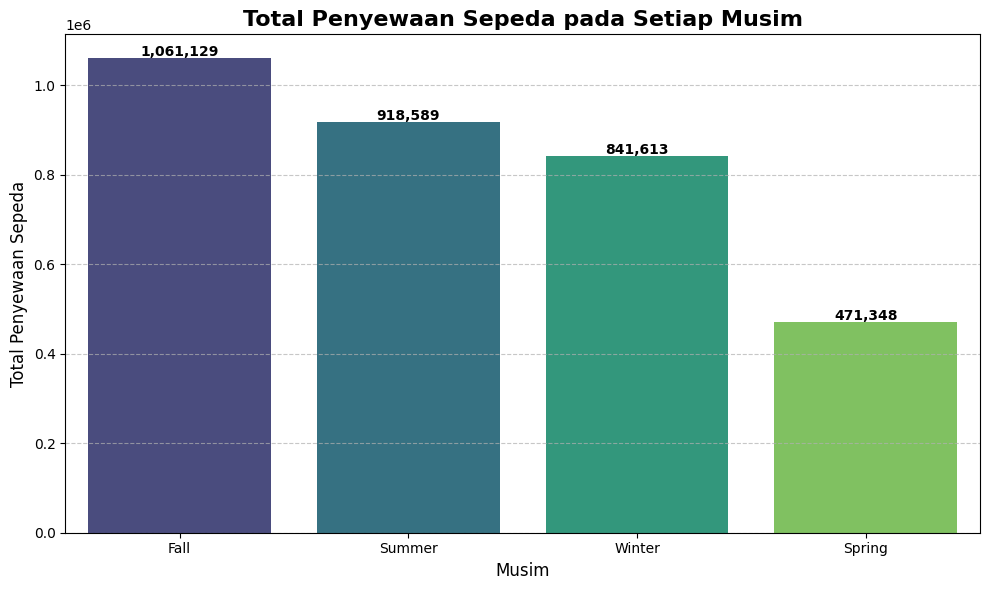

In [25]:
# Menghitung total penjualan berdasarkan musim
season_sales = bike_day_df.groupby("season").cnt.sum().sort_values(ascending=False).reset_index()

# Membuat barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=season_sales, x="season", y="cnt", palette="viridis")

# Menambahkan elemen pada plot
plt.title("Total Penyewaan Sepeda pada Setiap Musim", fontsize=16, fontweight="bold")
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Menampilkan nilai total penyewaan di atas setiap bar
for index, row in season_sales.iterrows():
    plt.text(x=index, y=row['cnt'] + 5000, s=f"{row['cnt']:,}",
             ha='center', fontsize=10, color='black', weight='bold')

# Menampilkan plot
plt.show()


Berdasarkan grafik di atas, didapatkan bahwa jumlah pelanggan terbanyak terjadi pada musim Fall(musim gugur), yaitu sebanyak 1.061.129 pelanggan ,sedangkan jumlah pelanggan paling sedikit terjadi pada musim Spring(musim semi), yaitu sebanyak 471.348 pelanggan saja.

<ipython-input-41-a97b0275f6d9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weathersit_season, x='cnt', y='weathersit', palette=["#c7a764","#b57f4e","#808756"])


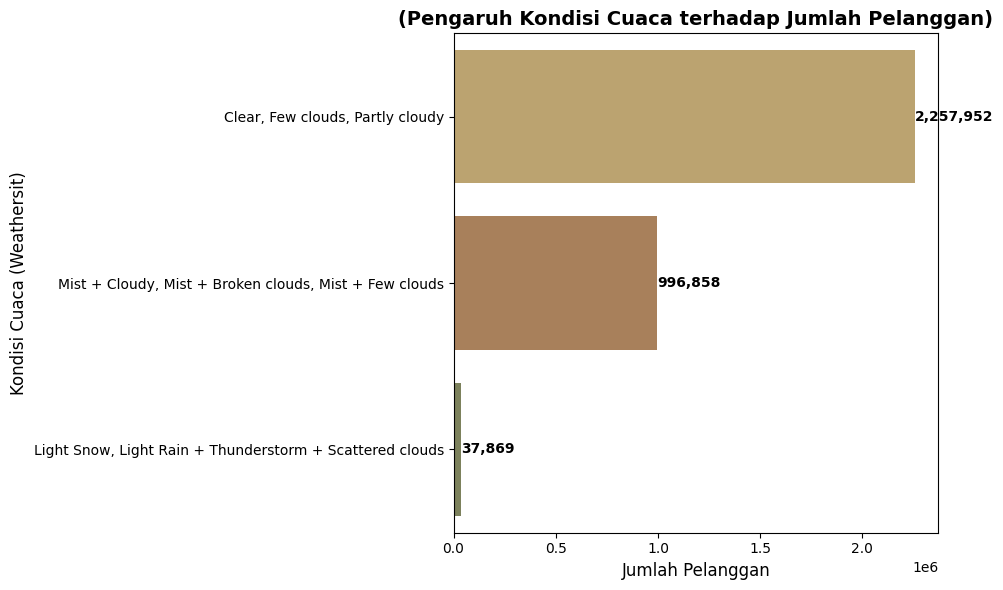

In [41]:
# Hubungan antara faktor cuaca dengan banyaknya pelanggan
weathersit_season = bike_day_df.groupby("weathersit")["cnt"].sum().sort_values(ascending=False).reset_index()

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=weathersit_season, x='cnt', y='weathersit', palette=["#c7a764","#b57f4e","#808756"])
plt.xlabel('Jumlah Pelanggan', fontsize=12)
plt.ylabel('Kondisi Cuaca (Weathersit)', fontsize=12)
plt.title('(Pengaruh Kondisi Cuaca terhadap Jumlah Pelanggan)', fontsize=14,fontweight="bold")

# Menambahkan nilai ke dalam plot
for index, row in weathersit_season.iterrows():
    plt.text(
        x=row['cnt'] + 500, y=index, s=f"{row['cnt']:,}",  # Posisi teks
        ha='left', va='center', fontsize=10, color='black', weight='bold'
    )

plt.tight_layout()
plt.show()



Berdasarkan grafik di atas, didapatkan bahwa pelanggan terbanyak terjadi saat cuaca (Clear, Few clouds, Partly cloudy) dan pelanggan paling sedikit terjadi saat cuaca (Light Snow, Light Rain + Thunderstorm + Scattered clouds). Dapat disimpulkan bahwa semakin cuacanya semakin berkurang jumlah pelanggannya.

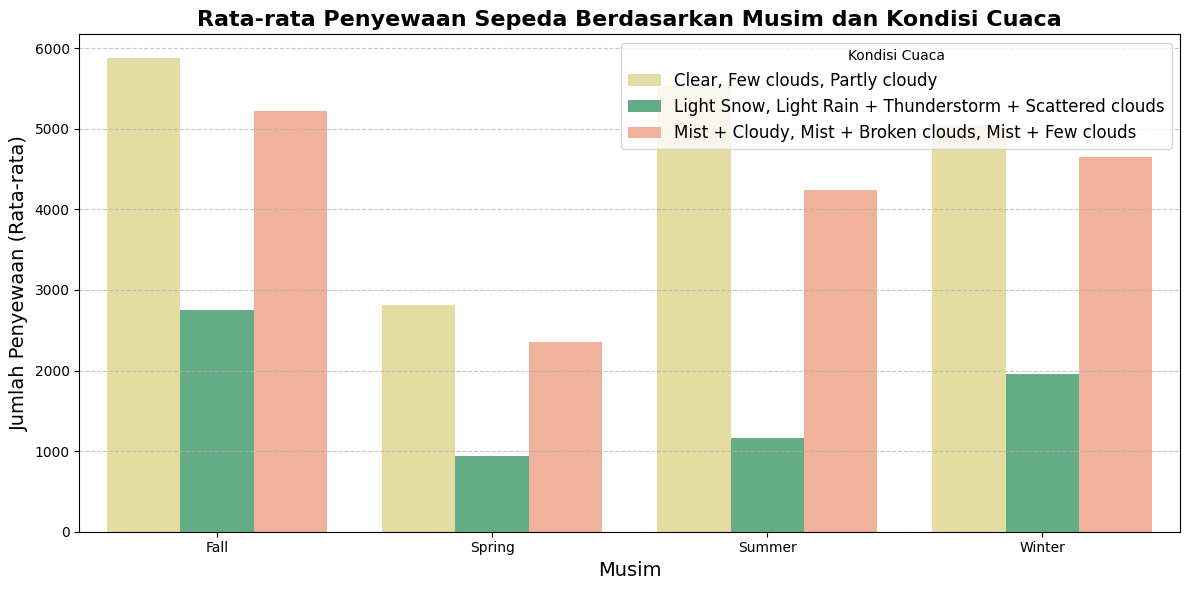

In [40]:
# Membuat pivot table untuk rata-rata jumlah penyewaan berdasarkan musim dan kondisi cuaca
pivot_table = bike_day_df.pivot_table(values="cnt", index="season", columns="weathersit", aggfunc="mean")

# Mengubah pivot table ke dalam format long (melting) untuk mempermudah plotting
melted_data = pivot_table.reset_index().melt(id_vars="season", value_name="avg_rentals", var_name="weathersit")

# Clustered bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_data, x="season", y="avg_rentals", hue="weathersit", palette=["#f0e594","#57b884","#ffab8d"])

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim dan Kondisi Cuaca", fontsize=16, fontweight="bold")
plt.xlabel("Musim", fontsize=14)
plt.ylabel("Jumlah Penyewaan (Rata-rata)", fontsize=14)
plt.legend(title="Kondisi Cuaca", loc="upper right", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Dari grafik di atas, kita mengetahui bahwa kondisi cuaca yang memiliki nilai rata-rata terbanyak setiap musimnya terjadi pada saat cuaca **(Clear, Few clouds, Partly cloudy)**, sebaliknya kondisi cuaca yang memiliki nilai rata-rata terendah setiap musimnya terjadi pada saat cuaca **(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)**

### Pertanyaan 2: Apakah jumlah sepeda yang dipinjam lebih tinggi pada hari kerja dibandingkan akhir pekan?

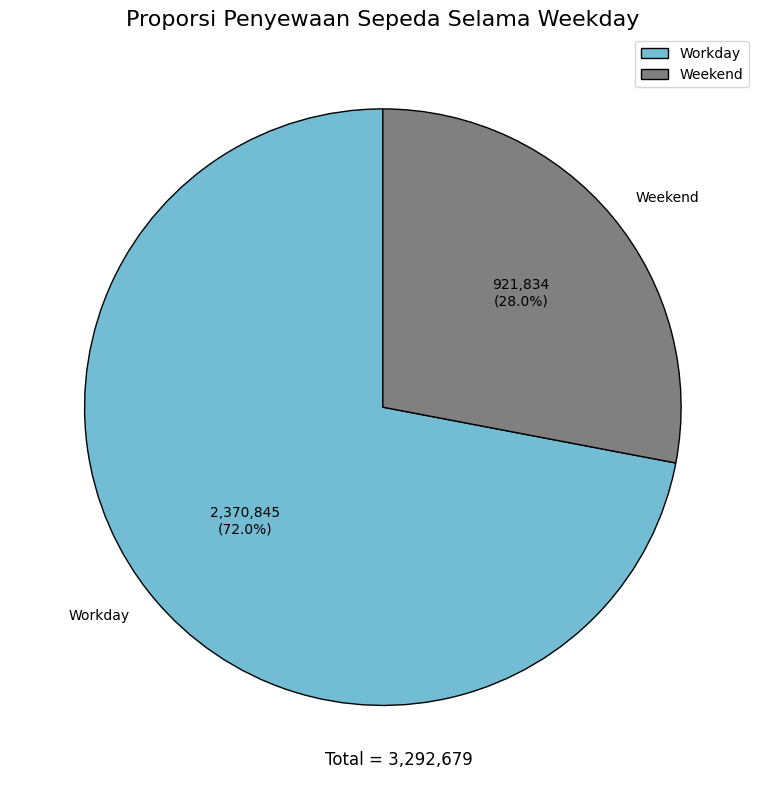

In [27]:
# Hubungan antara working day dengan jumlah pelanggan
weekday_sales = bike_day_df.groupby("day_type").cnt.sum().sort_values(ascending=False).reset_index()
labels = ["Workday", "Weekend"]

# Fungsi untuk menampilkan nilai dan persentase
def values(pct, all_values):
    absolute = int(round(pct / 100. * sum(all_values)))
    return f"{absolute:,}\n({pct:.1f}%)"

colors = ["#72BCD4", "gray"]

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    weekday_sales["cnt"],
    labels=weekday_sales["day_type"],
    autopct=lambda pct: values(pct, weekday_sales["cnt"]),
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "black"}
)

# Menambahkan elemen pada plot
plt.title("Proporsi Penyewaan Sepeda Selama Weekday", fontsize=16)
plt.legend(labels, loc='best')
plt.tight_layout()
plt.text(0.3, -1.2, f'Total = {weekday_sales["cnt"].sum():,}', fontsize=12, ha='right')
plt.show()


Berdasarkan grafik di atas, dapat dilihat bahwa proporsi jumlah pelanggan pada hari kerja (Workday) lebih banyak dibandingkan jumlah pelanggan pada akhir pekan (Weekend), dimana proporsi pelanggan pada hari kerja (Workday) sebanyak 72,0%, yaitu 2.370.845 pelanggan, sedangkan pada akhir pekan (Weekend) sebanyak 28,0%, yaitu 921.834 pelangggan.

### Pertanyaan 3: Apakah pertanyaan 1 dan pertanyaan 2 saling berhubungan?

<ipython-input-28-2e6ae81c6279>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bike_day_df, x="season", palette="viridis", ax=axes[0, 0])
<ipython-input-28-2e6ae81c6279>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bike_day_df, x="weathersit", palette="mako", ax=axes[0, 1])
<ipython-input-28-2e6ae81c6279>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bike_day_df, x="day_type", palette="cool", ax=axes[1, 0])


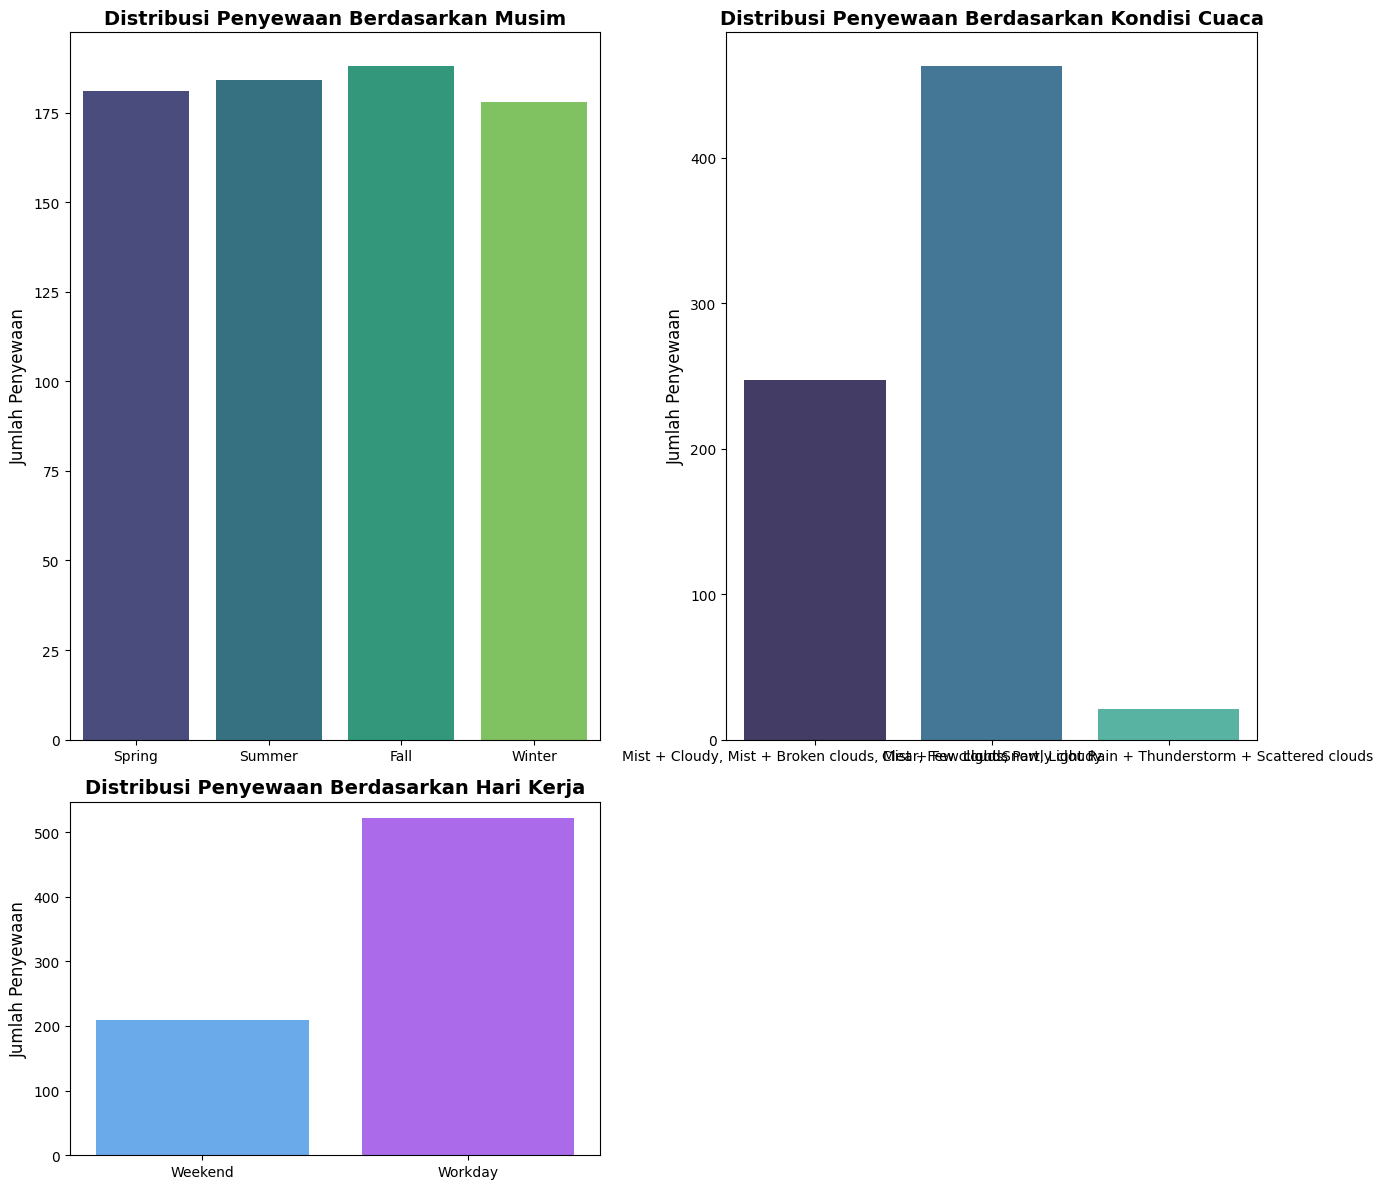

In [28]:
# Membuat Visualisasi Countplot Untuk Memeriksa Distribusi Kategori
fig, axes = plt.subplots(2, 2, figsize=(14, 12), gridspec_kw={'height_ratios': [1, 0.5]})

# Countplot untuk Season
sns.countplot(data=bike_day_df, x="season", palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Distribusi Penyewaan Berdasarkan Musim", fontsize=14, fontweight="bold")
axes[0, 0].set_xlabel(None)
axes[0, 0].set_ylabel("Jumlah Penyewaan", fontsize=12)

# Countplot untuk Weathersit
sns.countplot(data=bike_day_df, x="weathersit", palette="mako", ax=axes[0, 1])
axes[0, 1].set_title("Distribusi Penyewaan Berdasarkan Kondisi Cuaca", fontsize=14, fontweight="bold")
axes[0, 1].set_xlabel(None)
axes[0, 1].set_ylabel("Jumlah Penyewaan", fontsize=12)

# Countplot untuk Workingday
sns.countplot(data=bike_day_df, x="day_type", palette="cool", ax=axes[1, 0])
axes[1, 0].set_title("Distribusi Penyewaan Berdasarkan Hari Kerja", fontsize=14, fontweight="bold")
axes[1, 0].set_xlabel(None)
axes[1, 0].set_ylabel("Jumlah Penyewaan", fontsize=12)

# Menghapus subplot kosong
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()



,season,weathersit,day_type,cnt
0,Fall,"Clear, Few clouds, Partly cloudy",Weekend,5615.297297
1,Fall,"Clear, Few clouds, Partly cloudy",Workday,5976.535354
2,Fall,"Light Snow, Light Rain + Thunderstorm + Scatte...",Weekend,4459.000000
3,Fall,"Light Snow, Light Rain + Thunderstorm + Scatte...",Workday,2182.666667
4,Fall,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Weekend,5133.333333
5,Fall,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",Workday,5263.000000
6,Spring,"Clear, Few clouds, Partly cloudy",Weekend,2301.027027
7,Spring,"Clear, Few clouds, Partly cloudy",Workday,3066.189189
8,Spring,"Light Snow, Light Rain + Thunderstorm + Scatte...",Weekend,2169.000000
9,Spring,"Light Snow, Light Rain + Thunderstorm + Scatte...",Workday,523.333333


<Axes: xlabel='weathersit', ylabel='season'>

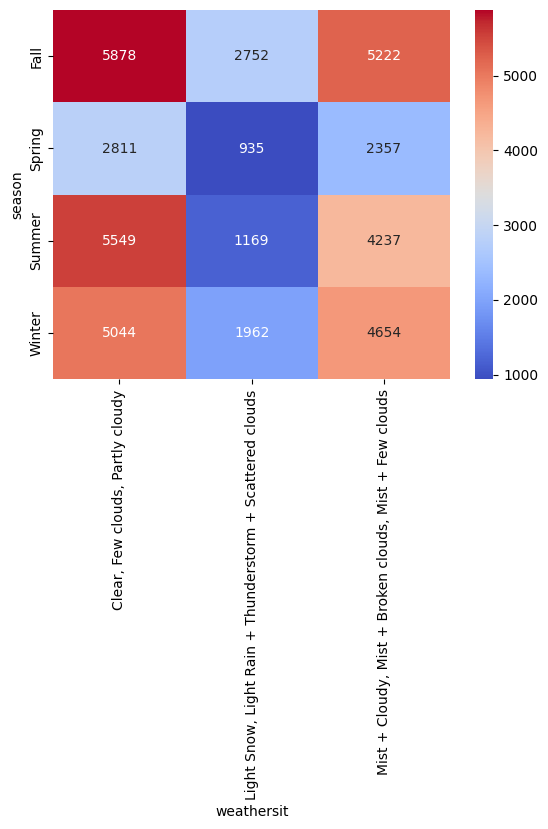

In [31]:
# Hubungan variabel kategorikal (season, weather, workingday) terhadap variabel numerik (jumlah pelanggan/cnt).
# Mencari rata-rata/total jumlah pelanggan berdasarkan kombinasi musim, cuaca, dan hari kerja.
summary = bike_day_df.groupby(["season", "weathersit", "day_type"])["cnt"].mean().reset_index()
display(summary)

# Interaksi antara Musim dan Cuaca
pivot_table = bike_day_df.pivot_table(values="cnt", index="season", columns="weathersit", aggfunc="mean")
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm")


Dari informasi grafik di atas, kita mengetahui bahwa tidak terdapat missing values pada setiap datanya, ini berarti data dapat di analisis lebih lanjut terkait pertanyaan bisnis.

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2